<a href="https://colab.research.google.com/github/Shahana2421/NLP/blob/main/Tweeet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/Tweets.csv")
df

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative
...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive


In [ ]:
df.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [ ]:
df.drop(["textID","selected_text"],axis=1,inplace=True)

In [ ]:
df.head()

,text,sentiment
0,"I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,negative
2,my boss is bullying me...,negative
3,what interview! leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...",negative


<Axes: xlabel='count', ylabel='sentiment'>

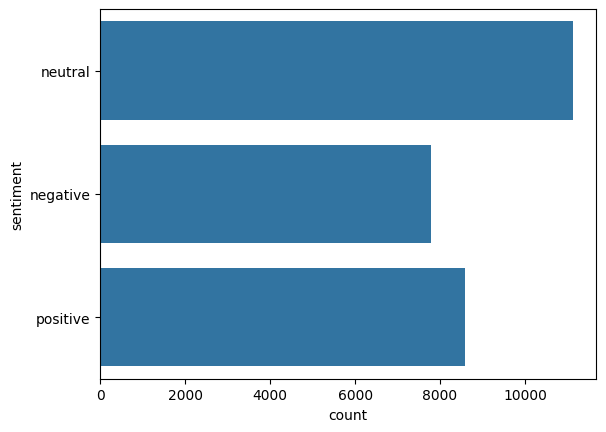

In [ ]:
import seaborn as sns
sns.countplot(df["sentiment"])

In [ ]:
df.isna().sum()

,0
text,1
sentiment,0


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isna().sum()

,0
text,0
sentiment,0


In [ ]:

df["sentiment"]=df["sentiment"].map({"positive":1,"negative":-1,"neutral":0})

In [ ]:
df.head()

,text,sentiment
0,"I`d have responded, if I were going",NaN
1,Sooo SAD I will miss you here in San Diego!!!,NaN
2,my boss is bullying me...,NaN
3,what interview! leave me alone,NaN
4,"Sons of ****, why couldn`t they put them on t...",NaN


In [ ]:
tweets=df.text
tweets

,text
0,"I`d have responded, if I were going"
1,Sooo SAD I will miss you here in San Diego!!!
2,my boss is bullying me...
3,what interview! leave me alone
4,"Sons of ****, why couldn`t they put them on t..."
...,...
27476,wish we could come see u on Denver husband l...
27477,I`ve wondered about rake to. The client has ...
27478,Yay good for both of you. Enjoy the break - y...
27479,But it was worth it ****.


In [ ]:
s="i** am ver!! yy haipp&& @@@$ 23234)"
import re
re.findall(r"\W+",s)

['** ', ' ', '!! ', ' ', '&& @@@$ ', ')']

In [ ]:
re.findall("[^0-9 a-z A-Z]+",s)

['**', '!!', '&&', '@@@$', ')']

In [ ]:
re.sub("\W"," ",s)

<>:1: SyntaxWarning: invalid escape sequence '\W'
<>:1: SyntaxWarning: invalid escape sequence '\W'
/tmp/ipython-input-2931422870.py:1: SyntaxWarning: invalid escape sequence '\W'
  re.sub("\W"," ",s)


'i   am ver   yy haipp        23234 '

In [ ]:
tweets=tweets.str.replace("[^a-z0-9A-Z]"," ",regex=True)
tweets

,text
0,I d have responded if I were going
1,Sooo SAD I will miss you here in San Diego
2,my boss is bullying me
3,what interview leave me alone
4,Sons of why couldn t they put them on t...
...,...
27476,wish we could come see u on Denver husband l...
27477,I ve wondered about rake to The client has ...
27478,Yay good for both of you Enjoy the break y...
27479,But it was worth it


In [ ]:
import nltk
from nltk.stem import SnowballStemmer
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize

sn=SnowballStemmer("english")
tweets=tweets.apply(lambda x:" ".join([sn.stem(i.lower()) for i in word_tokenize(x)]))


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
tweets

,text
0,i d have respond if i were go
1,sooo sad i will miss you here in san diego
2,my boss is bulli me
3,what interview leav me alon
4,son of whi couldn t they put them on the relea...
...,...
27476,wish we could come see u on denver husband los...
27477,i ve wonder about rake to the client has made ...
27478,yay good for both of you enjoy the break you p...
27479,but it was worth it


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
sw=stopwords.words("english")
sw


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [ ]:
tweets=tweets.apply(lambda x:" ".join([i for i in x.split() if i not in sw]))



In [ ]:
tweets

,text
0,respond go
1,sooo sad miss san diego
2,boss bulli
3,interview leav alon
4,son whi put releas alreadi bought
...,...
27476,wish could come see u denver husband lost job ...
27477,wonder rake client made clear net onli forc de...
27478,yay good enjoy break probabl need hectic weeke...
27479,worth


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
x=tfidf.fit_transform(tweets)
x

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 193542 stored elements and shape (27480, 20792)>

In [ ]:
print(x)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 193542 stored elements and shape (27480, 20792)>
  Coords	Values
  (0, 15290)	0.9191437223243717
  (0, 8035)	0.39392234985044733
  (1, 16861)	0.42974221229041293
  (1, 15718)	0.3256985860262162
  (1, 12104)	0.28951920011538
  (1, 15788)	0.5387610776674352
  (1, 5693)	0.5789276258665148
  (2, 3253)	0.6417535852847812
  (2, 3567)	0.7669109047171836
  (3, 9650)	0.6543244188075268
  (3, 10812)	0.49440241329924595
  (3, 1712)	0.5722113321807547
  (4, 16842)	0.4567496611630373
  (4, 19909)	0.3175893546657029
  (4, 14724)	0.3787812823499606
  (4, 15183)	0.480339452514198
  (4, 1722)	0.35841023836805624
  (4, 3269)	0.433425426530454
  (5, 9177)	0.15105590315641038
  (5, 20299)	0.23598399869170736
  (5, 5986)	0.386659319717322
  (5, 4612)	0.16298900606210526
  (5, 16679)	0.386659319717322
  (5, 16163)	0.386659319717322
  (5, 14241)	0.31519304534051384
  :	:
  (27476, 10689)	0.2930233573907863
  (27476, 12759)	0.2518532592302079
  (27

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,df['sentiment'],test_size=0.2,random_state=42)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
nb.fit(x_train,y_train)

MultinomialNB()

In [ ]:
y_predict=nb.predict(x_test)
y_predict

array(['positive', 'neutral', 'neutral', ..., 'neutral', 'neutral',
       'neutral'], dtype='<U8')

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)

0.61863173216885

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_predict=rf.predict(x_test)
y_predict

array(['positive', 'neutral', 'neutral', ..., 'neutral', 'neutral',
       'neutral'], dtype=object)

In [ ]:
a=["you are a bad"]
b=tfidf.transform(a)
b


<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1 stored elements and shape (1, 20792)>

In [ ]:
nb.predict(b)

array(['negative'], dtype='<U8')

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)

0.7092430858806404